# k-means - wyeryfikacja

Nawet jeśli nasza metoda znajdzie odpowiednią ilość grup, to czy uzyskany wynik będzie dobry? Załóżmy że znamy ground-truth clustering i sprawdźmy kiedy k-means daje poprawny wynik

ZADANIE: Wykonaj algorytm k-means na danych WINE z grupami $k=1,\ldots,20$ i narysuj wykres zależności miar

```python
metrics.homogeneity_score
metrics.completeness_score
metrics.v_measure_score
metrics.adjusted_rand_score
metrics.adjusted_mutual_info_score
```

od ilośi klastrów. Oceń dla jakiej ilości klastrów k-means dał wynik najbliższy do ground-truth.

Powyższe wskaźniki nie biorą pod uwagę etykiety klastra a jedynie przyporządkowanie par punktów (permutacja etykiet klastrów nie zmienia wyniku)

In [1]:
##import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets
wine = datasets.load_wine()

X=wine.data[:,1:3]
y = wine.target

# plt.scatter(X[:,0], X[:, 1], c = y)
# plt.show()

Zobacz że etykietowanie klastrów nie musi być zgodne z prawdziwym etykietowaniem  (crosstab pomiędzy etykietami ground-truth oraz klastrowani)

In [10]:
from sklearn.metrics import silhouette_score
from sklearn import metrics


SSE_array = [None]
homogeneity_score_array = [None]
completeness_score_array = [None]
v_measure_score_array = [None]
adjusted_rand_score_array = [None]
adjusted_mutual_info_score_array = [None]
silhouette_score_array = [None]

for i in range(1,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    SSE_array.append(km.inertia_)

    homogeneity_score_array.append(metrics.homogeneity_score(y, y_km))
    completeness_score_array.append(metrics.completeness_score(y, y_km))
    v_measure_score_array.append(metrics.v_measure_score(y, y_km))
    adjusted_rand_score_array.append(metrics.adjusted_rand_score(y, y_km))
    adjusted_mutual_info_score_array.append(metrics.adjusted_mutual_info_score(y,  y_km))
#     silhouette_score_array.append(silhouette_score(X, y_km, metric='euclidean'))

ZADANIE: Powtórz zadanie dla danych digits. 

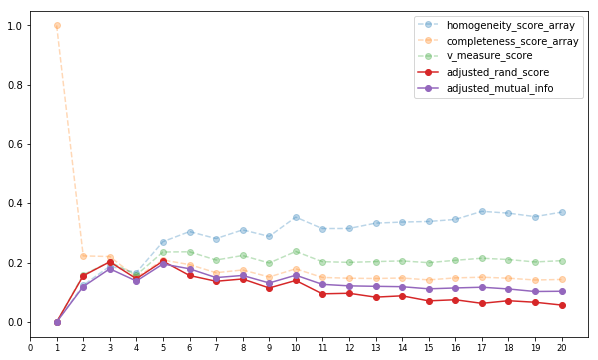

In [11]:
t=range(0,21)
plt.figure(figsize=(10,6));
# plt.plot(SSE_array)
plt.plot( homogeneity_score_array, "o--", label="homogeneity_score_array", alpha = 0.3)
plt.plot( completeness_score_array, "o--", label="completeness_score_array", alpha = 0.3)
plt.plot( v_measure_score_array, "o--", label="v_measure_score", alpha = 0.3)
plt.plot( adjusted_rand_score_array, "o-", label="adjusted_rand_score")
plt.plot( adjusted_mutual_info_score_array, "o-", label="adjusted_mutual_info")
plt.xlim(0,21)
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

Oczywiście w praktyce etykiety są niedostępne.

Aby ocenić grupowanie (porównać dwa grupowania) możemy:
* zweryfikować wielkość klastrów
* policzyć SSE
* policzyć silhouette score (spójność klastrów)



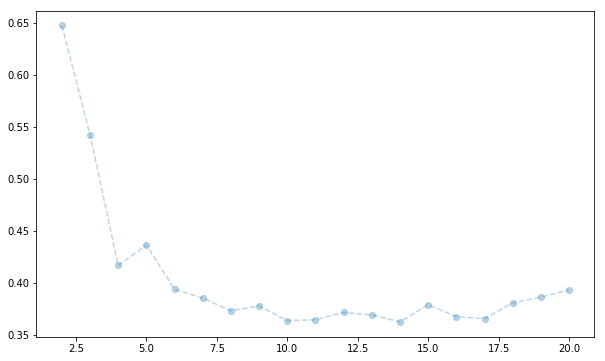

In [12]:
from sklearn.metrics import silhouette_score
scores = []
t=range(2,21)
for k in t:
    km = KMeans(n_clusters=k)
    y_km = km.fit_predict(X)
    score = silhouette_score(X, y_km, metric='euclidean')
    scores.append(score)


plt.figure(figsize=(10,6))
plt.plot(t, scores, "o--", label="homogeneity_score_array", alpha = 0.3)
plt.show()